# Desafio 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [3]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams["figure.figsize"] = (10, 6)

In [4]:
BASE_PATH = './Datos/'
BABY_INFO = 'baby.csv'
df = pd.read_csv(BASE_PATH+BABY_INFO, index_col=0)
df.head()

,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
1,120,284,27,62,100,False
2,113,282,33,64,135,False
3,128,279,28,64,115,True
4,108,282,23,67,125,True
5,136,286,25,62,93,False


## 1. Realiza una exploración de los datos, considerando sus tipos y los descriptivos correspondientes.

In [5]:
df.describe()

,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,119.462521,279.101363,27.228279,64.049404,128.478705
std,18.328671,16.010305,5.817839,2.526102,20.734282
min,55.000000,148.000000,15.000000,53.000000,87.000000
25%,108.000000,272.000000,23.000000,62.000000,114.250000
50%,120.000000,280.000000,26.000000,64.000000,125.000000
75%,131.000000,288.000000,31.000000,66.000000,139.000000
max,176.000000,353.000000,45.000000,72.000000,250.000000


In [6]:
df.groupby('Maternal.Smoker').count()

,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight
Maternal.Smoker,,,,,
False,715,715,715,715,715
True,459,459,459,459,459


## 2. Considera los pesos de los bebés. ¿Se puede decir que siguen una distribución normal? 
Justifica tu respuesta creando los gráficos y modelos necesarios.


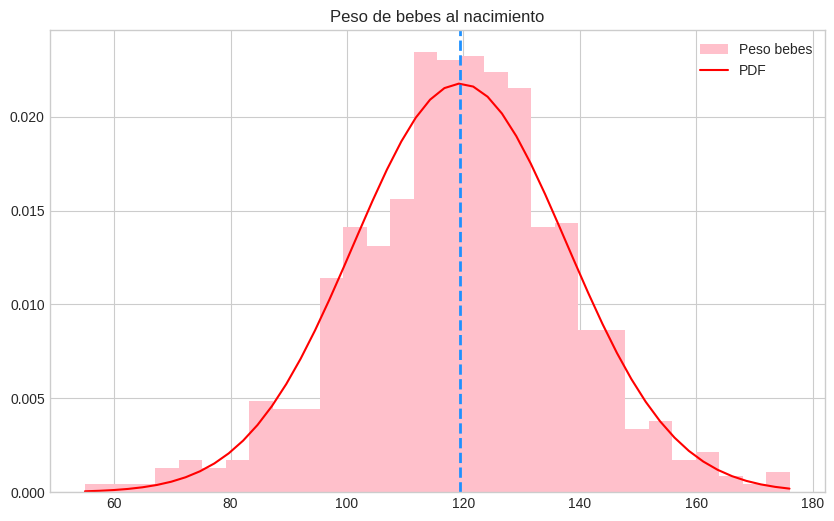

In [7]:
from scipy.stats import norm


mu=df['Birth.Weight'].mean()
sigma=df['Birth.Weight'].std()
minimo=df['Birth.Weight'].min()
maximo=df['Birth.Weight'].max()
x = np.linspace(minimo, maximo)

pdf = norm.pdf(x, loc=mu, scale=sigma)


plt.hist(df['Birth.Weight'], color='pink', alpha=1, density=True, bins=30, label='Peso bebes')
plt.plot(x, pdf, color='red', label='PDF')
plt.axvline(df['Birth.Weight'].mean(), color='dodgerblue', linestyle='--', lw=2)
plt.title("Peso de bebes al nacimiento");
plt.legend()
plt.show()


In [8]:
print('media', df['Birth.Weight'].mean())
pesos_ordenados =  df['Birth.Weight'].sort_values().reset_index(drop=True)
print('mediana', pesos_ordenados[pesos_ordenados.shape[0]/2])

media 119.46252129471891
mediana 120


In [9]:
from scipy.stats import shapiro
stat, p = shapiro(pesos_ordenados)
print('Estadisticos=%.3f, p=%.3f' % (stat, p))
# Interpretación
alpha = 0.05
if p > alpha:
   print('La muestra parece Gaussiana o Normal (no se rechaza la hipótesis nula H0)')
else:
   print('La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)')


Estadisticos=0.996, p=0.002
La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)


Segun el test de hipotesis nos da que la muestra no sigue una distribucion normal, pero segun lo visto en el grafico superior se observa que esta se asemeja a una.
Adicionalmente al comparar la media con la mediana se observa que estos estan muy cercanos, cosa requerida en una distribucion normal


## 3. Considerando lo anterior, verifica el modelo de distribución normal de los pesos para 5 valores diferentes. 
Compara con los datos reales.


In [10]:
mu, sigma

(119.46252129471891, 18.32867144332099)

In [11]:
valores_pesos = [65, 90, 140, 150, 165]

for peso in valores_pesos:
    p_muestra = round(stats.percentileofscore(df['Birth.Weight'], peso), 5)
    p_modelo = round(100*norm.cdf(peso, loc=mu, scale=sigma), 5)
    print(f'Para el valor {peso} se tiene que el percentil de la muestra es {p_muestra} y el del modelo es {p_modelo}')

Para el valor 65 se tiene que el percentil de la muestra es 0.46848 y el del modelo es 0.1482
Para el valor 90 se tiene que el percentil de la muestra es 5.6644 y el del modelo es 5.39773
Para el valor 140 se tiene que el percentil de la muestra es 88.07496 y el del modelo es 86.8752
Para el valor 150 se tiene que el percentil de la muestra es 95.61329 y el del modelo es 95.21537
Para el valor 165 se tiene que el percentil de la muestra es 99.23339 y el del modelo es 99.35132


## 4. Compara los pesos de los bebés de madres fumadoras y no fumadoras. ¿Qué diferencias existen? 
Explica y construye los modelos correspondientes.


In [12]:
non_smoker_mom = df[df['Maternal.Smoker'] == False]['Birth.Weight']
smoker_mom = df[df['Maternal.Smoker'] == True]['Birth.Weight']

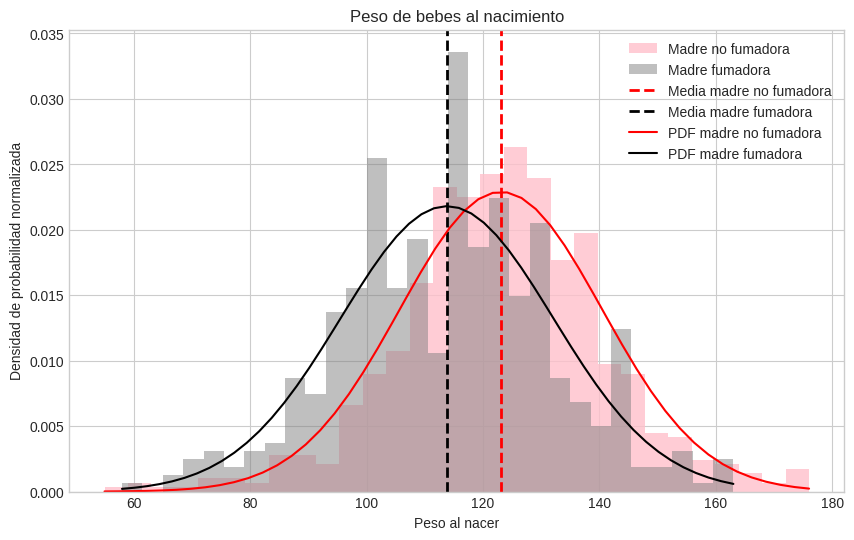

In [13]:

def gen_model(data):
    mu=data.mean()
    sigma=data.std()
    minimo=data.min()
    maximo=data.max()
    return norm.pdf(np.linspace(minimo, maximo), loc=mu, scale=sigma)

plt.hist(non_smoker_mom, color='pink', alpha=.8, density=True, bins=30, label='Madre no fumadora')
plt.hist(smoker_mom, color='grey', alpha=.5, density=True, bins=30, label='Madre fumadora')
plt.axvline(non_smoker_mom.mean(), color='red', linestyle='--', lw=2, label='Media madre no fumadora')
plt.axvline(smoker_mom.mean(), color='black', linestyle='--', lw=2, label='Media madre fumadora')
plt.plot(
    np.linspace(non_smoker_mom.min(), non_smoker_mom.max()),
    gen_model(non_smoker_mom), color='red', label='PDF madre no fumadora')
plt.plot(
    np.linspace(smoker_mom.min(), smoker_mom.max()),
    gen_model(smoker_mom), color='black', label='PDF madre fumadora')


plt.xlabel('Peso al nacer') 
plt.ylabel('Densidad de probabilidad normalizada') 
plt.title("Peso de bebes al nacimiento");
plt.legend()
plt.show()

Con la informacion entregada por el grafico concluimos que en promedio los pesos de los bebes con madres fumadoras es menor al peso de los bebes con madres que no fuman, adicional que los casos con madre no fumadora tienen menor dispersion

## 5. Considerando los datos dados:
### Calcula la probabilidad de que una madre escogida al azar fume.

In [14]:
total_datos = df.shape[0]
total_fumadoras = smoker_mom.shape[0]
prob_fumadora = round(total_fumadoras/total_datos, 5)

print(f'La probabilidad de escoger una mama al azar y que esta sea fumadora es de un {prob_fumadora*100}%')

La probabilidad de escoger una mama al azar y que esta sea fumadora es de un 39.097%


### A partir del valor anterior, construye un modelo de distribución binomial que modele el experimento correspondiente a escoger 5 madres al azar y observar cuántas fuman.

In [15]:
np.random.binomial(5, prob_fumadora)

1

### Utilizando este modelo, simula 1000 muestras de tamaño 8, y calcula sus medias muestrales.

In [22]:
data_modelo = np.asarray([np.random.binomial(5, prob_fumadora, 8).mean() for _ in range(1000)])

In [23]:
data_muestra = np.asarray([np.array([np.random.choice(df['Maternal.Smoker'], 5,  replace=False).sum() for i in range(8)]).mean() for _ in range(1000)])

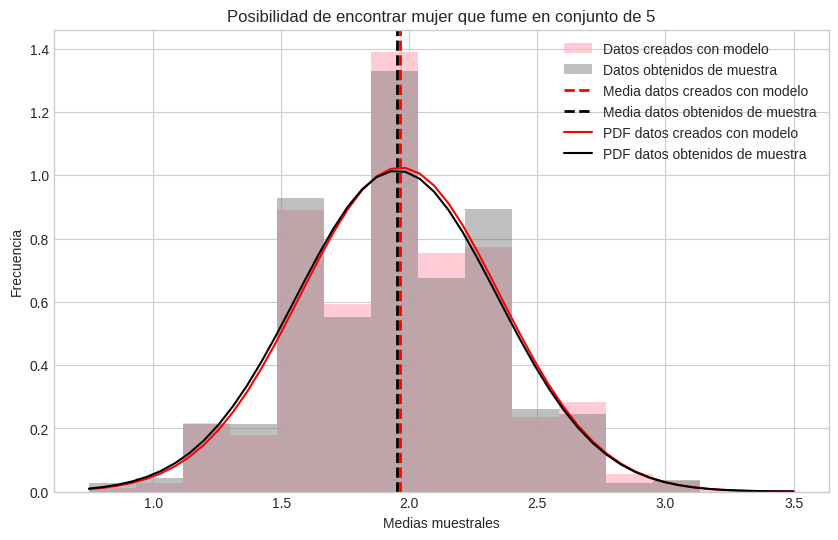

In [24]:
def gen_model(data):
    mu=data.mean()
    sigma=data.std()
    minimo=data.min()
    maximo=data.max()
    return norm.pdf(np.linspace(minimo, maximo), loc=mu, scale=sigma)

plt.hist(data_modelo, color='pink', alpha=.8, density=True, bins=15, label='Datos creados con modelo')
plt.hist(data_muestra, color='grey', alpha=.5, density=True, bins=15, label='Datos obtenidos de muestra')
plt.axvline(data_modelo.mean(), color='red', linestyle='--', lw=2, label='Media datos creados con modelo')
plt.axvline(data_muestra.mean(), color='black', linestyle='--', lw=2, label='Media datos obtenidos de muestra')
plt.plot(
    np.linspace(data_modelo.min(), data_modelo.max()), 
    gen_model(data_modelo), 
    color='red', 
    label='PDF datos creados con modelo'
)
plt.plot(
    np.linspace(data_muestra.min(), data_muestra.max()),
    gen_model(data_muestra), color='black', label='PDF datos obtenidos de muestra')


plt.xlabel('Medias muestrales') 
plt.ylabel('Frecuencia') 
plt.title("Posibilidad de encontrar mujer que fume en conjunto de 5");
plt.legend()
plt.show()